In [1]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/abhishek/anaconda3/envs/apebench"
import sys
sys.path.append("../")
sys.path.append("../common")

In [2]:
import apebench
import jax.numpy as jnp
import exponax as ex

/home/abhishek/anaconda3/envs/apebench/lib/python3.10/site-packages/trainax/_general_trainer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


(51, 1, 160)


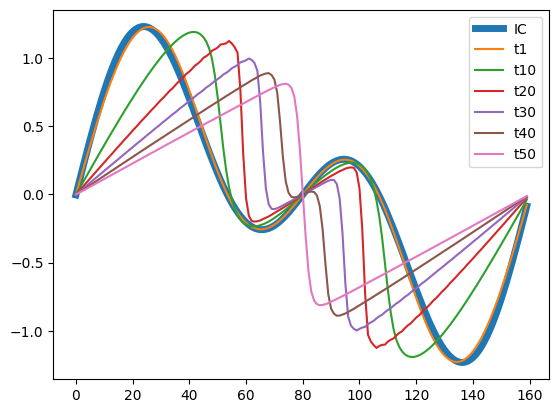

False


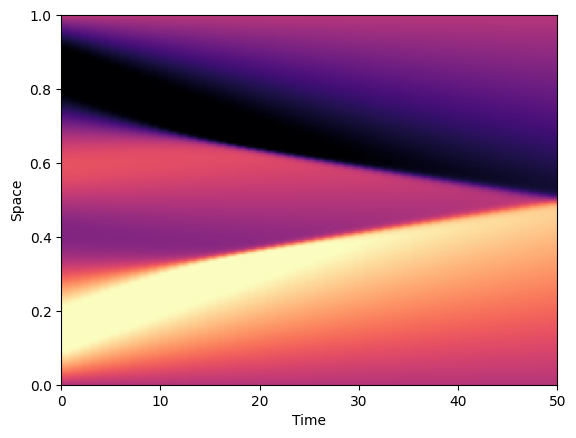

In [3]:
import matplotlib.pyplot as plt
from scenarios import MelissaSpecificScenario

DIFF = 1.5

m_scenario = MelissaSpecificScenario(
    scenario_name="diff_burgers",
    sampled_ic_config="sine_sup;-0.7;3.14;0.7;6.28",
    diffusion_gamma=DIFF
)

stepper = m_scenario.get_stepper()
ic_mesh = m_scenario.get_ic_mesh()

trj = ex.rollout(
    stepper_fn=stepper,
    n=50,
    include_init=True
)(ic_mesh)
print(trj.shape)
plt.plot(trj[0, 0], label="IC", linewidth=5)
for t in [1, 10, 20, 30, 40, 50]:
    plt.plot(trj[t, 0], label=f"t{t}")
plt.legend()
plt.show()

print(jnp.isnan(trj).any())
ex.viz.plot_spatio_temporal(trj, cmap='magma')

(51, 1, 160)


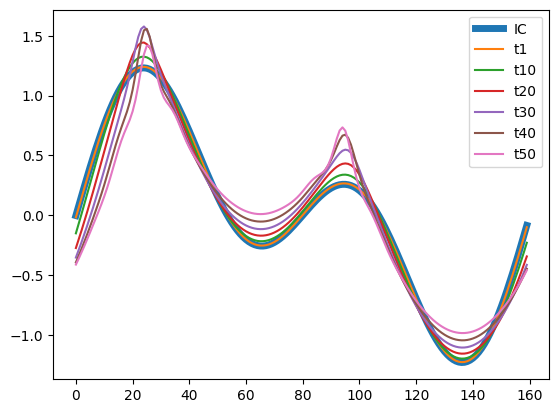

False


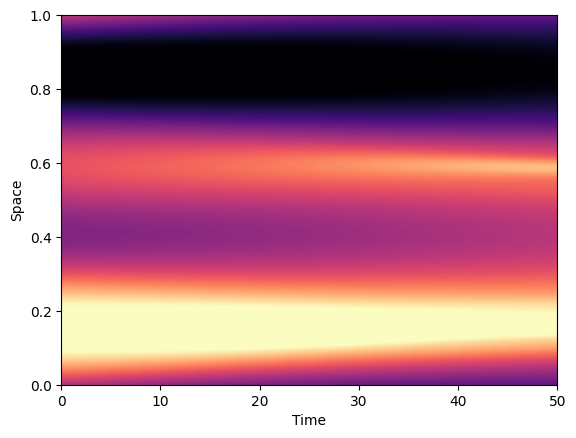

In [4]:
import matplotlib.pyplot as plt
from scenarios import MelissaSpecificScenario

m_scenario = MelissaSpecificScenario(
    scenario_name="diff_ks",
    sampled_ic_config="sine_sup;-0.7;3.14;0.7;6.28",
)

stepper = m_scenario.get_stepper()
ic_mesh = m_scenario.get_ic_mesh()

trj = ex.rollout(
    stepper_fn=stepper,
    n=50,
    include_init=True
)(ic_mesh)
print(trj.shape)
plt.plot(trj[0, 0], label="IC", linewidth=5)
for t in [1, 10, 20, 30, 40, 50]:
    plt.plot(trj[t, 0], label=f"t{t}")
plt.legend()
plt.show()

print(jnp.isnan(trj).any())
ex.viz.plot_spatio_temporal(trj, cmap='magma')